# **Сравнение Matplotlib и Seaborn:**

**1. Уровень абстракции:**

  * Matplotlib: Низкоуровневая библиотека, требует ручной настройки всех элементов

  * Seaborn: Высокоуровневая надстройка, автоматизирует многие задачи

**2. Синтаксис `seaborn` проще и удобнее кода `matplotlib`**

**3. Интеграция с Pandas:**

  * Seaborn: Прямая работа с DataFrame, автоматические подписи

  * Matplotlib: Часто требуется предварительная обработка данных

**4. Визуальное оформление:**

  * Seaborn: Красивые стили по умолчанию

  * Matplotlib: Более базовый дизайн, требует ручной стилизации

**5. Статистические графики:**

  * Seaborn: Встроенная поддержка сложных статистических визуализаций

  * Matplotlib: Требуется ручная реализация

**6. Гибкость:**

  * Matplotlib: Полный контроль над каждым элементом графика

  * Seaborn: Быстрое создание сложных графиков, но меньше контроля

# Когда что использовать:
**Matplotlib:**

  * Когда нужен полный контроль над графиком

  * Нестандартные визуализации

  * Требуется максимальная производительность для больших данных

**Seaborn:**

  * Быстрый исследовательский анализ

  * Статистическая визуализация

  * При работе с Pandas DataFrame

  * Когда важна "красота" из коробки

# **Подготовка**

**Импортируем необходимые библиотеки:**

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Загружаем датасет:**

In [2]:
# Строим первые графики
titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Seaborn

In [3]:
# Сброс стилей к оригинальным настройкам
sns.reset_orig()

<ipython-input-4-2c9b66e935c5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic, x="class", y="survived", ci=None)


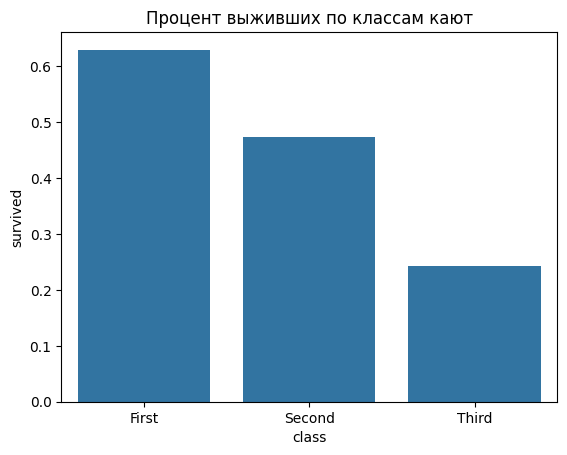

In [4]:
# Визуализируем выживаемость пассажиров по классам
sns.barplot(data=titanic, x="class", y="survived", ci=None)
plt.title("Процент выживших по классам кают")
plt.show()

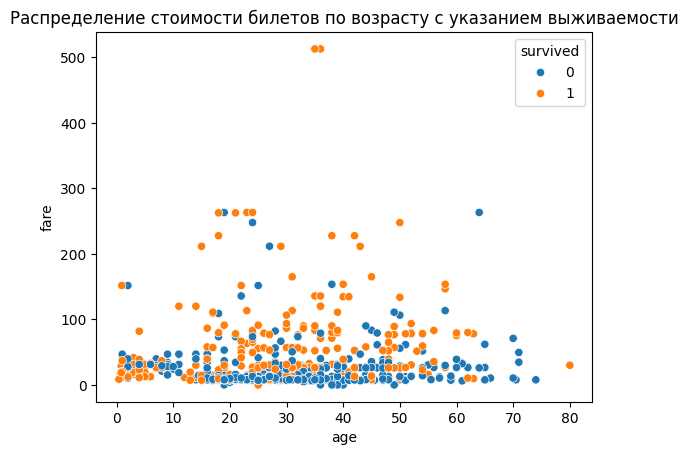

In [5]:
# Точечный график (Scatter plot)
sns.scatterplot(data=titanic, x="age", y="fare", hue="survived")
plt.title("Распределение стоимости билетов по возрасту с указанием выживаемости")
plt.show()

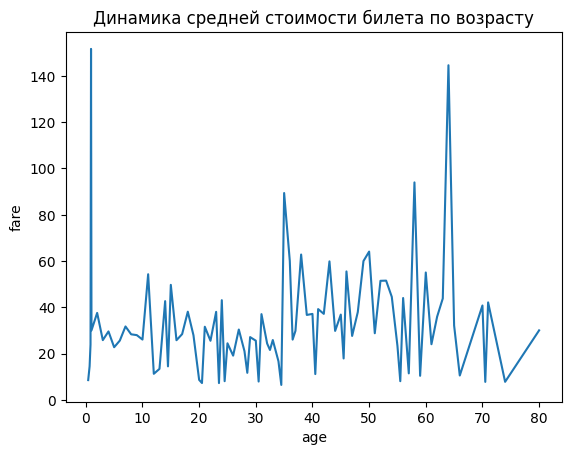

In [6]:
# Линейный график (Line plot)
# Сгруппируем данные по возрасту и найдем среднюю стоимость билета
age_fare = titanic.groupby('age')['fare'].mean().reset_index()
sns.lineplot(data=age_fare, x="age", y="fare")
plt.title("Динамика средней стоимости билета по возрасту")
plt.show()

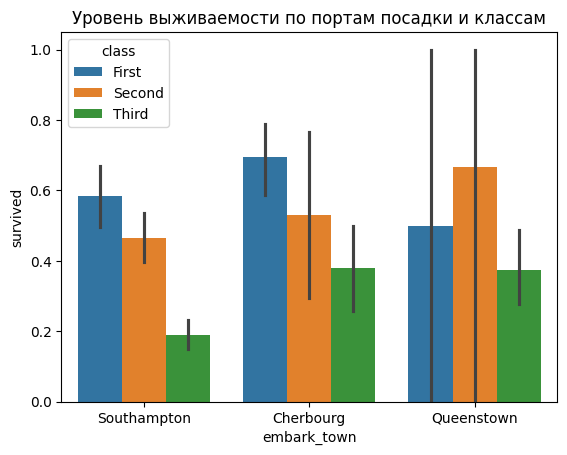

In [7]:
# Столбчатая диаграмма (Bar plot)
sns.barplot(data=titanic, x="embark_town", y="survived", hue="class")
plt.title("Уровень выживаемости по портам посадки и классам")
plt.show()

Text(0.5, 1.0, 'Распределение по полу')

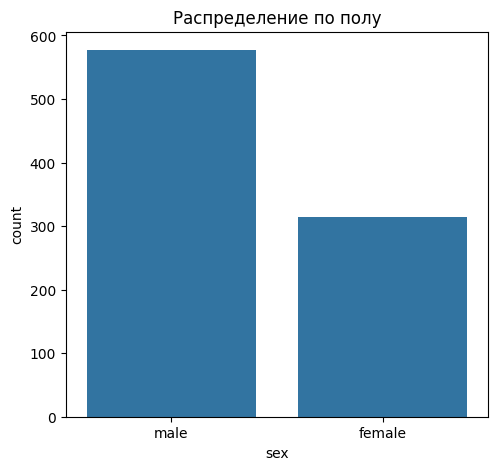

In [8]:
# Расширенные возможности с matplotlib
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.countplot(x='sex', data=titanic)
plt.title("Распределение по полу")

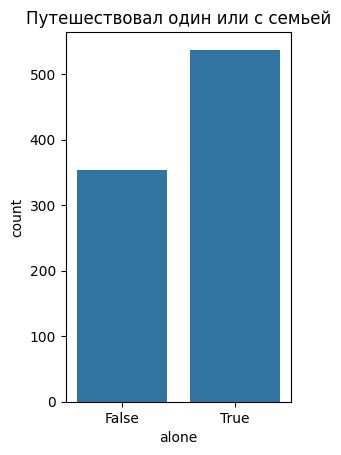

In [9]:
plt.subplot(1, 2, 2)
sns.countplot(x='alone', data=titanic)
plt.title("Путешествовал один или с семьей")
plt.show()

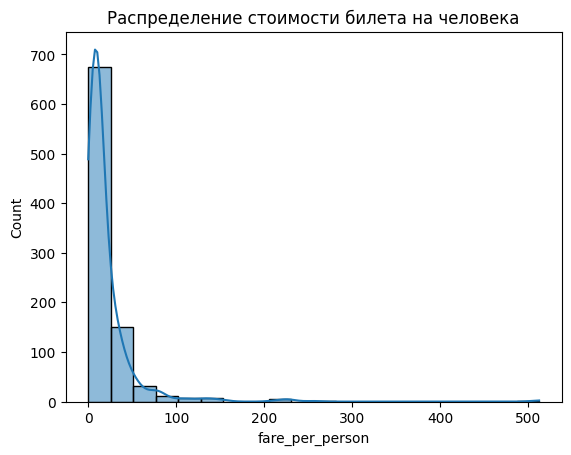

In [10]:
# Seaborn и Pandas: расширенный анализ
titanic['fare_per_person'] = titanic['fare'] / (titanic['sibsp'] + titanic['parch'] + 1)
sns.histplot(data=titanic, x="fare_per_person", bins=20, kde=True)
plt.title("Распределение стоимости билета на человека")
plt.show()

# Создание красивых графиков с помощью стилей

In [11]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Распределение возраста по классам (whitegrid)')

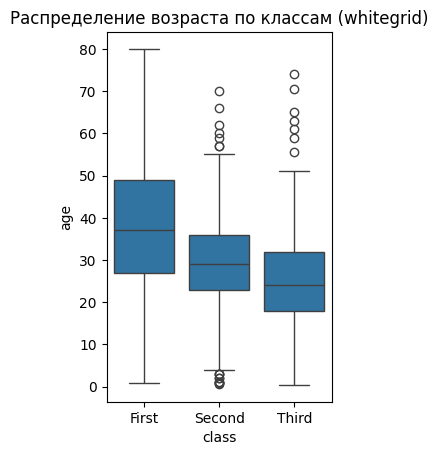

In [12]:
plt.subplot(1,2,1)
sns.set_style("whitegrid")
sns.boxplot(x='class', y='age', data=titanic)
plt.title("Распределение возраста по классам (whitegrid)")

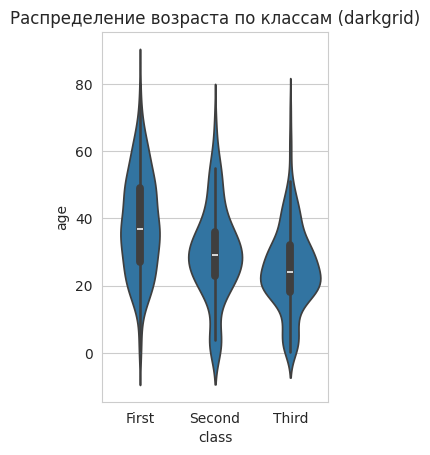

In [13]:

plt.subplot(1,2,2)
sns.set_style("darkgrid")
sns.violinplot(x='class', y='age', data=titanic)
plt.title("Распределение возраста по классам (darkgrid)")
plt.show()

# Полезные графики для EDA

**Тепловая карта выживаемости**

<ipython-input-14-e379558fc22b>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = titanic.pivot_table(
<ipython-input-14-e379558fc22b>:1: FutureWarning: The provided callable <function mean at 0x7feada5bd3a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = titanic.pivot_table(


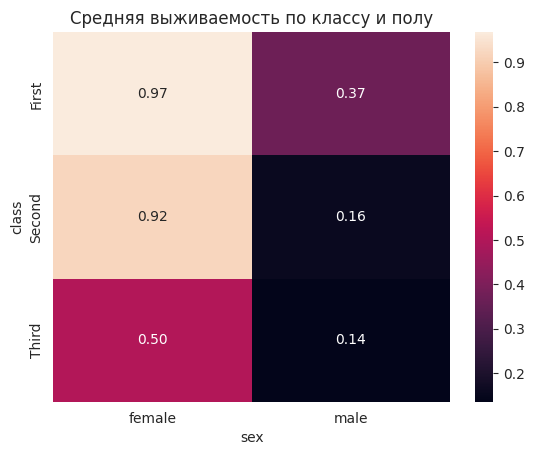

In [14]:
pivot = titanic.pivot_table(
    index="class",
    columns="sex",
    values="survived",
    aggfunc=np.mean
)
sns.heatmap(pivot, annot=True, fmt=".2f")
plt.title("Средняя выживаемость по классу и полу")
plt.show()

**Фасетная сетка (PairGrid)**

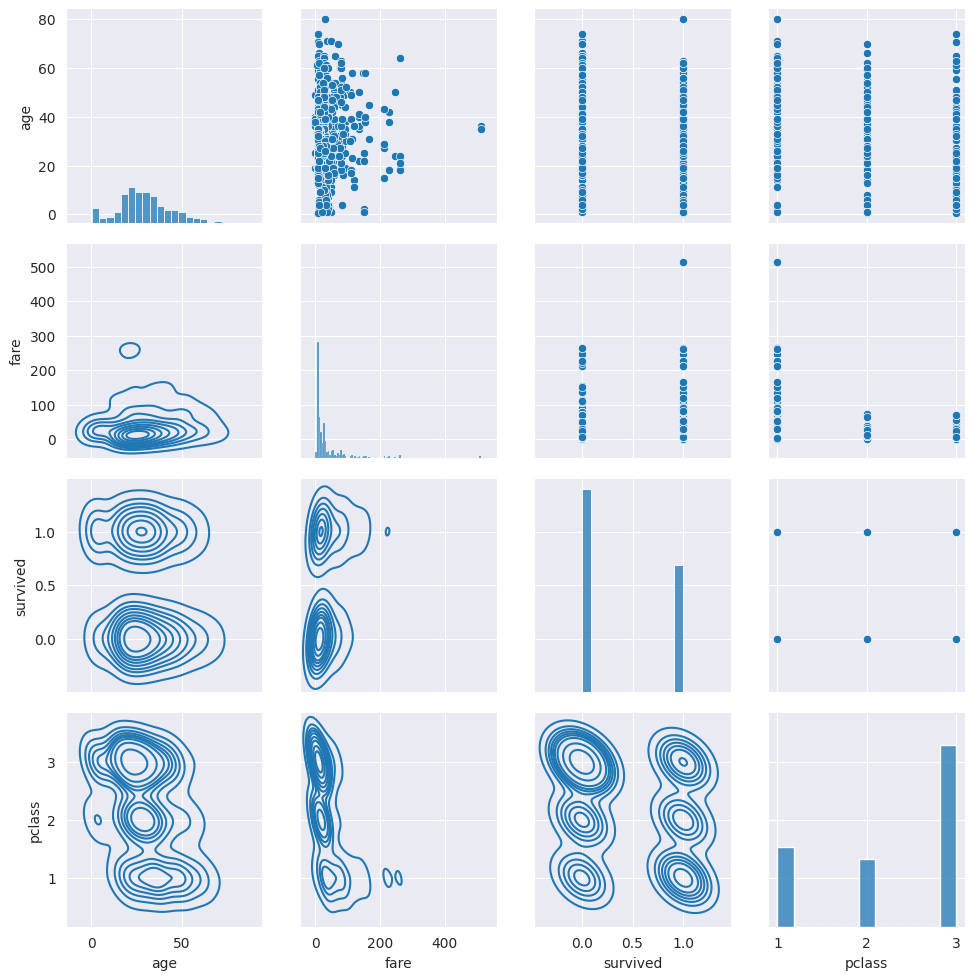

In [15]:
g = sns.PairGrid(titanic[['age', 'fare', 'survived', 'pclass']])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
plt.show()

**Категориальное распределение**

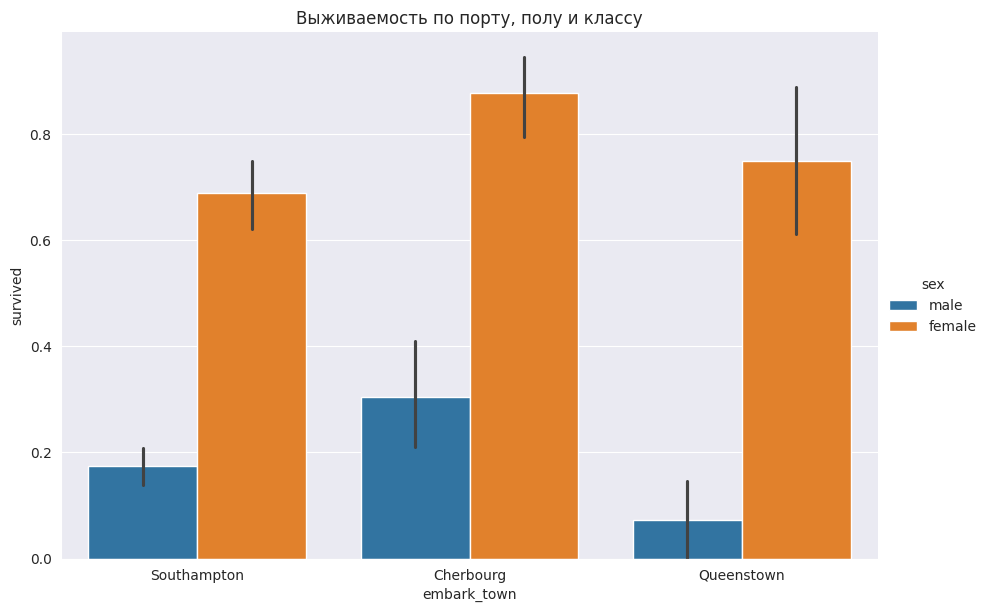

In [19]:
sns.catplot(
    x="embark_town",
    y="survived",
    hue="sex",
    kind="bar",
    data=titanic,
    height=6,
    aspect=1.5,
    # errorbar=None
)
plt.title("Выживаемость по порту, полу и классу")
plt.show()